In [9]:
pip install autoscraper

In [10]:
from autoscraper import AutoScraper
import pandas as pd
import numpy as np
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
amazon_url='https://www.amazon.com/OnePlus-Unlocked-Android-Smartphone-Charging/product-reviews/B07XWGWPH5/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType'
wanted_list = ["Holden","It phone make calls"]

In [12]:
scraper = AutoScraper()
result = scraper.build(amazon_url,wanted_list)
print(result)

['Holden', 'De Oppresso Liber', 'Kindle Customer', 'SuperDave', 'NtxivNeej', 'K. Newton', 'Thomas Cilloni', 'Darrin  S', 'hugh dean', 'jockchrisfi', 'It phone make calls', "This is a Super Nice phone. These phones are (NOT) locked to T-Moblile. My carrier is AT&T. It has an advanced technology, operating system, function, and the fingerprint reader works better than any phone I've had. Having said that, it's very easy to setup. I have AT&T as my carrier, I just swaped the sim card from my old phone and it was ready to setup. Keep in mind this phone does have a Setup Wizard which guides you throught the process. It does have a slot for expandable memory. The technology of this phone works great, I have a pair of Raycon E55 earbuds that have the new 5.0 bluetooth technology (stereo sound) and they sounded awesome on my previous phone but they sound even better on this new N200 5G. I was conflicted between buying the N200 5G and N10 5G, both are very similar but personally I think the N20

In [13]:
scraper.get_result_similar(amazon_url,grouped=True)

{'rule_uavl': ['Holden',
  'De Oppresso Liber',
  'Kindle Customer',
  'SuperDave',
  'NtxivNeej',
  'K. Newton',
  'Thomas Cilloni',
  'Darrin  S',
  'hugh dean',
  'jockchrisfi'],
 'rule_2cpo': ['Holden', 'Thomas Cilloni'],
 'rule_7lq9': ['It phone make calls',
  "This is a Super Nice phone. These phones are (NOT) locked to T-Moblile. My carrier is AT&T. It has an advanced technology, operating system, function, and the fingerprint reader works better than any phone I've had. Having said that, it's very easy to setup. I have AT&T as my carrier, I just swaped the sim card from my old phone and it was ready to setup. Keep in mind this phone does have a Setup Wizard which guides you throught the process. It does have a slot for expandable memory. The technology of this phone works great, I have a pair of Raycon E55 earbuds that have the new 5.0 bluetooth technology (stereo sound) and they sounded awesome on my previous phone but they sound even better on this new N200 5G. I was conflict

In [15]:
scraper.set_rule_aliases({'rule_7lq9':"Review"})
scraper.keep_rules(['rule_7lq9'])
scraper.save("amazon-search")

In [16]:
results = scraper.get_result_similar("https://www.amazon.com/OnePlus-Unlocked-Android-Smartphone-Charging/product-reviews/B07XWGWPH5/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews",group_by_alias=True)
results["Review"]

['It phone make calls',
 "This is a Super Nice phone. These phones are (NOT) locked to T-Moblile. My carrier is AT&T. It has an advanced technology, operating system, function, and the fingerprint reader works better than any phone I've had. Having said that, it's very easy to setup. I have AT&T as my carrier, I just swaped the sim card from my old phone and it was ready to setup. Keep in mind this phone does have a Setup Wizard which guides you throught the process. It does have a slot for expandable memory. The technology of this phone works great, I have a pair of Raycon E55 earbuds that have the new 5.0 bluetooth technology (stereo sound) and they sounded awesome on my previous phone but they sound even better on this new N200 5G. I was conflicted between buying the N200 5G and N10 5G, both are very similar but personally I think the N200 5G is the better model. Do yourself a favor and spend an extra few dollars to buy the suggested phone protection case with a black surround. This

In [17]:
afinn = pd.read_csv("Afinn.csv", sep=",", encoding="latin-1")
afinn.shape

(2477, 2)

In [18]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [19]:
onplus = results["Review"]

In [20]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(onplus))
sentences

['It phone make calls This is a Super Nice phone.',
 'These phones are (NOT) locked to T-Moblile.',
 'My carrier is AT&T.',
 "It has an advanced technology, operating system, function, and the fingerprint reader works better than any phone I've had.",
 "Having said that, it's very easy to setup.",
 'I have AT&T as my carrier, I just swaped the sim card from my old phone and it was ready to setup.',
 'Keep in mind this phone does have a Setup Wizard which guides you throught the process.',
 'It does have a slot for expandable memory.',
 'The technology of this phone works great, I have a pair of Raycon E55 earbuds that have the new 5.0 bluetooth technology (stereo sound) and they sounded awesome on my previous phone but they sound even better on this new N200 5G.',
 'I was conflicted between buying the N200 5G and N10 5G, both are very similar but personally I think the N200 5G is the better model.',
 'Do yourself a favor and spend an extra few dollars to buy the suggested phone protect

In [21]:
oneplus_df = pd.DataFrame(sentences, columns=["review_comments"])
oneplus_df

,review_comments
0,It phone make calls This is a Super Nice phone.
1,These phones are (NOT) locked to T-Moblile.
2,My carrier is AT&T.
3,"It has an advanced technology, operating syste..."
4,"Having said that, it's very easy to setup."
...,...
80,The camera is beautiful it's not slow at all I...
81,I only had this phone for a couple of days and...
82,The battery holds up great for me and with all...
83,When I get my paycheck again I'm gonna be buyi...


In [22]:
affinity_score = afinn.set_index("word")["value"].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [23]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_score

def calculate_sentiment(text: str=None):
    sent_score=0
    if text :
        sentence = nlp(text)
        for word in sentence:
             sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [24]:
oneplus_df["sentiment_value"] = oneplus_df["review_comments"].apply(calculate_sentiment)

In [25]:
oneplus_df["word_count"] = oneplus_df["review_comments"].str.split().apply(len)
oneplus_df["word_count"].head(10)

0    10
1     7
2     4
3    19
4     8
5    22
6    16
7     8
8    42
9    26
Name: word_count, dtype: int64

In [26]:
oneplus_df.head()

,review_comments,sentiment_value,word_count
0,It phone make calls This is a Super Nice phone.,3,10
1,These phones are (NOT) locked to T-Moblile.,0,7
2,My carrier is AT&T.,0,4
3,"It has an advanced technology, operating syste...",1,19
4,"Having said that, it's very easy to setup.",1,8


In [27]:
oneplus_df['sentiment_value'].describe()

count    85.000000
mean      0.505882
std       2.476670
min      -6.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      12.000000
Name: sentiment_value, dtype: float64

C:\Users\Ajay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

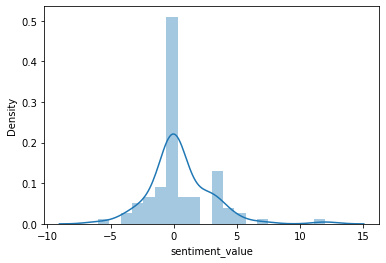

In [28]:
import seaborn as sns
sns.distplot(oneplus_df["sentiment_value"])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

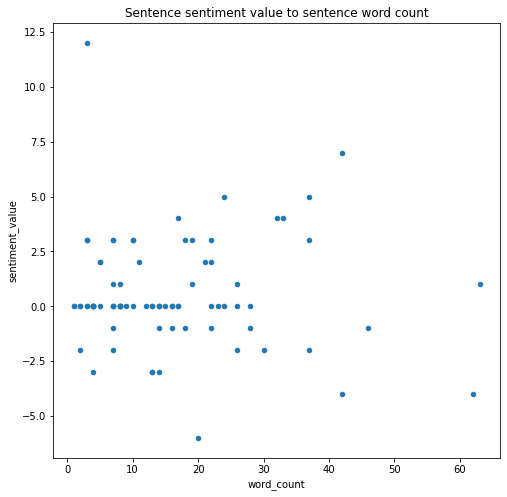

In [29]:
oneplus_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

<AxesSubplot:ylabel='sentiment_value'>

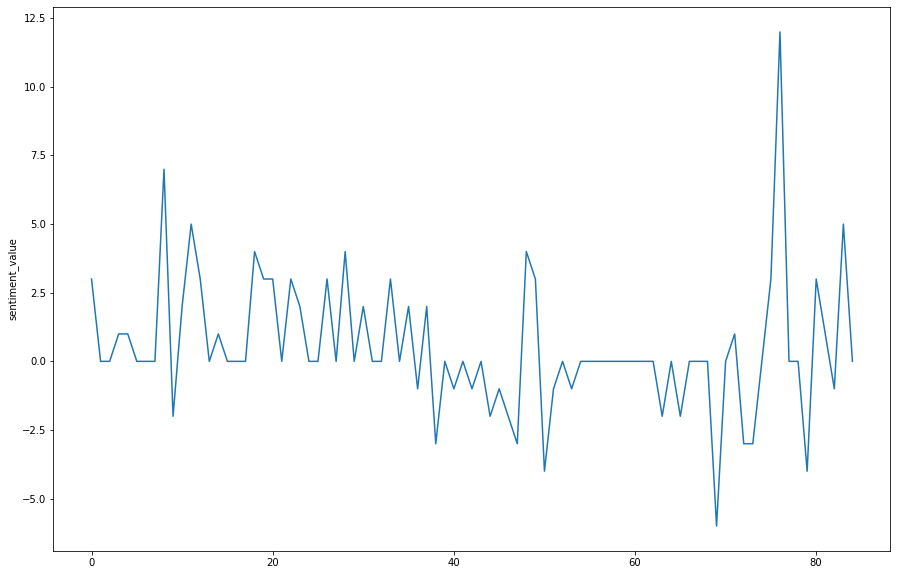

In [30]:
plt.figure(figsize=(15,10))
sns.lineplot(x=oneplus_df.index,y='sentiment_value',data=oneplus_df)

In [31]:
from wordcloud import WordCloud
ip_rev_string = " ".join(oneplus_df["review_comments"])

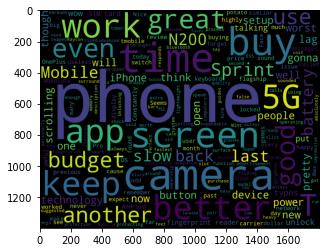

In [32]:
wordcloud_ip = WordCloud(background_color='black',width=1800,height=1400).generate(ip_rev_string)
plt.imshow(wordcloud_ip)